### import libraries

In [68]:
import sys
import numpy as np
import math
import matplotlib.pyplot as plt
sys.path.append(str('/home/alexandre/Documents/Projects'))

from slmOptim.patternSLM import patterns as pt
from slmOptim.optimization import phase_conjugation
from slmOptim.zeluxPy import helper_functions as cam
from slmOptim.optimization.init_experiment import InitExperiment
from slmOptim.optimization.iteration_algorithms import ContinuousSequential
from slmOptim.optimization.iteration_algorithms import StepwiseSequential

from slmOptim.optimization import cost_functions

import time
from scipy import ndimage


### set experiment parameters

In [143]:
# SLM resolution
resX, resY = (800, 600)

# the number of controlled segments on the SLM
slm_segments = 37 ** 2

diam = int(slm_segments ** 0.5)

# size of macropixels on slm
n = round(math.log2(resY / diam + 1))
slm_macropixels = n + 1
print(slm_macropixels)
phase_steps = 8

# Define observation window on camera
roi_size = 200
off = (0, 0)

# Define camera macropixel, this is defined by the measured speckel grain
bins = 1

# Define camera acquisition parameters
exposure_time = 190
gain = 1
timeout= 100

# save data
path = '/home/optomeca/Documents/measurements'

5


In [97]:
mag = [4, 5, 6, 7]
segs = [75, 37, 18, 9]
for n, m in zip(mag, segs):
    diam = 2 ** (n - 1) * m
    print(diam, m ** 2)

600 5625
592 1369
576 324
576 81


In [124]:
37 * 37

1369

### Initialize SLM and cam check a frame

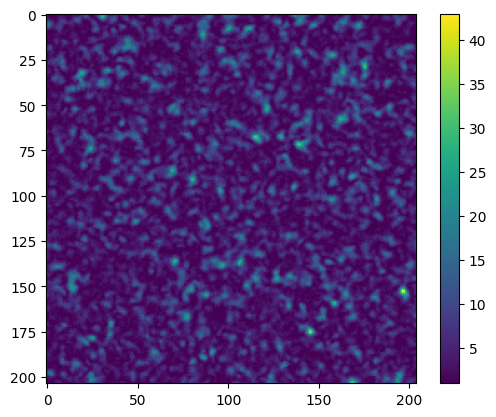

In [115]:
init = InitExperiment(roi_size, off, bins, exposure_time, gain, timeout)
camera = init.init_cam()
# slm = init.init_slm()
# # 
frame = camera.get_pending_frame_or_null()
frame = np.copy(frame.image_buffer)
plt.imshow(frame)
plt.colorbar()

# print(frame.shape)

In [112]:
init.close_cam()

In [ ]:
init.close_cam()

### define cost function

In [5]:
# define target for the correlation cost function only
target_shape = (104, 104)
tgt = phase_conjugation.Target(target_shape)
target = tgt.square((4, 4), offset_x=0, offset_y=0, intensity=100)

# choose one cost function to pass to optim object    
# cost_fun = lambda x: cost_functions.corr_coef(x, target)
cost_fun = lambda x: cost_functions.snr(x, mask_radius=4)


##### Load patterns that will be used for optimization using a custom pattern loader

In [144]:
# create pattenr loader


pattern_loader = pt.OnePixelPatternGenerator(slm_segments)
print(len(pattern_loader))

N = [45, 249, 1005, 4281]

1005


#### run the algorithm

In [145]:
# cost = {}
# slm_segments = 256
# for step in range(1, 16):

# create pattenr loader

pattern_loader = pt.OnePixelPatternGenerator(slm_segments)
len(pattern_loader)

# instantiate optimization class
optim = ContinuousSequential(slm, camera, 
                        pattern_loader, 
                        total_iterations=4,
                        slm_segments=slm_segments,
                        slm_macropixel=slm_macropixels,
                        phase_steps=phase_steps, 
                        save_path=path)

optim = StepwiseSequential(slm, camera, 
                        pattern_loader, 
                        total_iterations=6,
                        slm_segments=slm_segments,
                        slm_macropixel=slm_macropixels,
                        phase_steps=phase_steps, 
                        save_path=path)

# pass cost function to object
optim.register_callback(cost_fun)

# run the algorithm
pattern, cost, frames = optim.run()
# optim.save_raw()        

  0%|          | 0/1005 [00:00<?, ?it/s]

Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitt

  0%|          | 0/1005 [00:00<?, ?it/s]

Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitt

  0%|          | 0/1005 [00:00<?, ?it/s]

Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitt

  0%|          | 0/1005 [00:00<?, ?it/s]

Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitt

  0%|          | 0/1005 [00:00<?, ?it/s]

Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitt

  0%|          | 0/1005 [00:00<?, ?it/s]

Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitt

### Apply optimized mask and get frame

Data transmitted


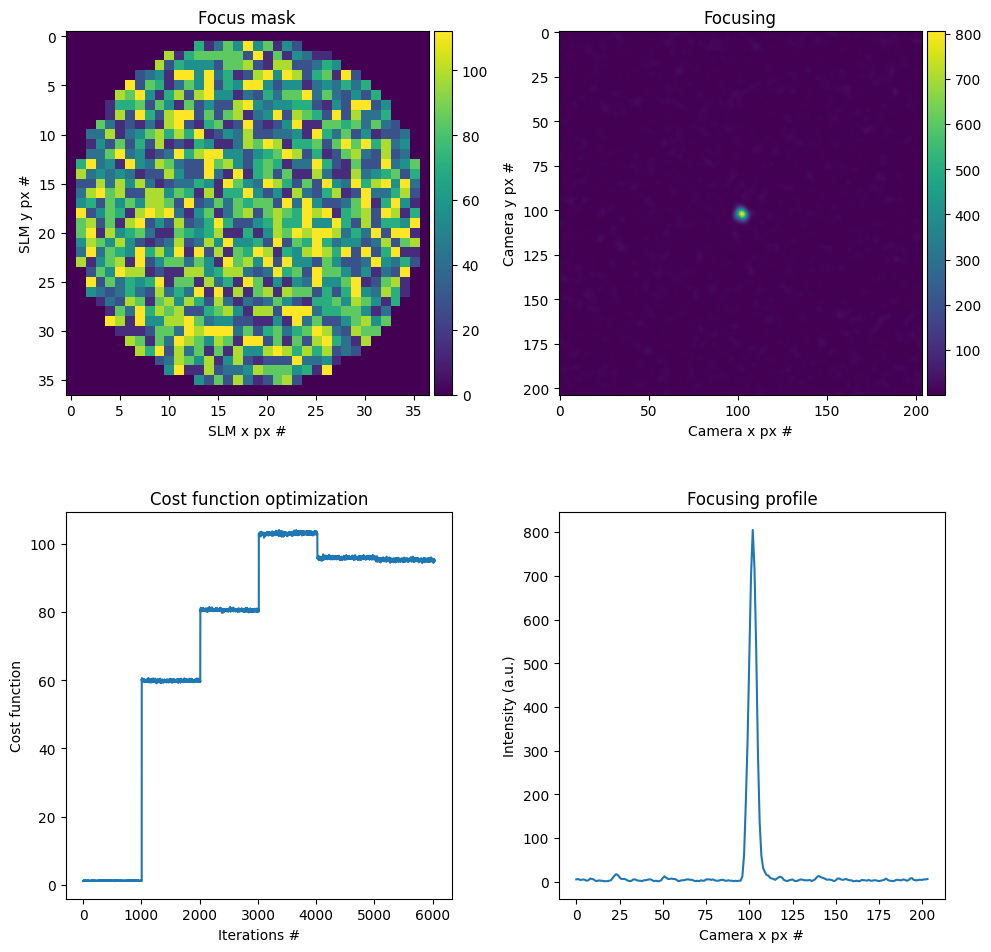

In [146]:
patternSLM = pt.Pattern(resX, resY)

mask = patternSLM._enlarge_pattern(pattern, slm_macropixels)
mask = patternSLM.add_subpattern(mask)

slm.sendArray(mask)
# # slm.updateArray(temp)

frame = camera.get_pending_frame_or_null()
focus = np.copy(frame.image_buffer)

optim.plot(focus, 102)
# optim.save_raw()

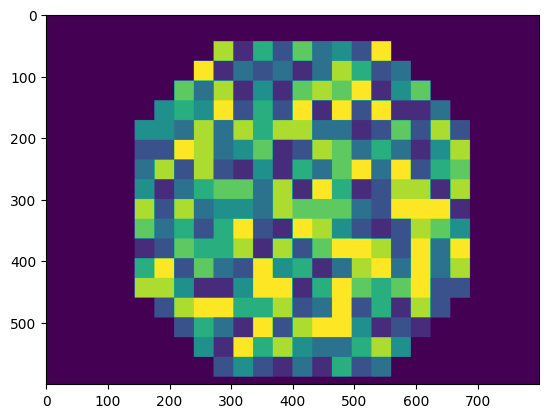

In [38]:
plt.imshow(mask)

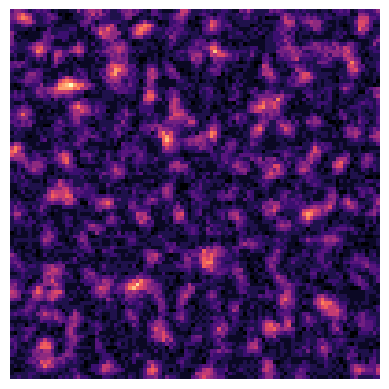

In [8]:
plt.imshow(focus[350:450, 350:450], cmap='magma')
plt.axis('off')
plt.savefig('optim.png', dpi=200, transparent=True, bbox_inches='tight')

In [ ]:
init.close_cam()
# init.close_slm()

In [33]:
pat = pt.Pattern(resX, resY)
mirror = pat.mirror()
slm.sendArray(mirror)

Data transmitted


1

In [ ]:
had = pt.HadamardPatternGenerator(256)
pattern = had[65]
patternSLM = pt.Pattern(resX, resY)

mask = patternSLM._enlarge_pattern(pattern, 5)
mask = patternSLM.add_subpattern(mask)

slm.sendArray(mask)


  0%|          | 0/45 [00:00<?, ?it/s]

Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitt

  0%|          | 0/249 [00:00<?, ?it/s]

Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitt

  0%|          | 0/1005 [00:00<?, ?it/s]

Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitt

  0%|          | 0/4281 [00:00<?, ?it/s]

Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitt

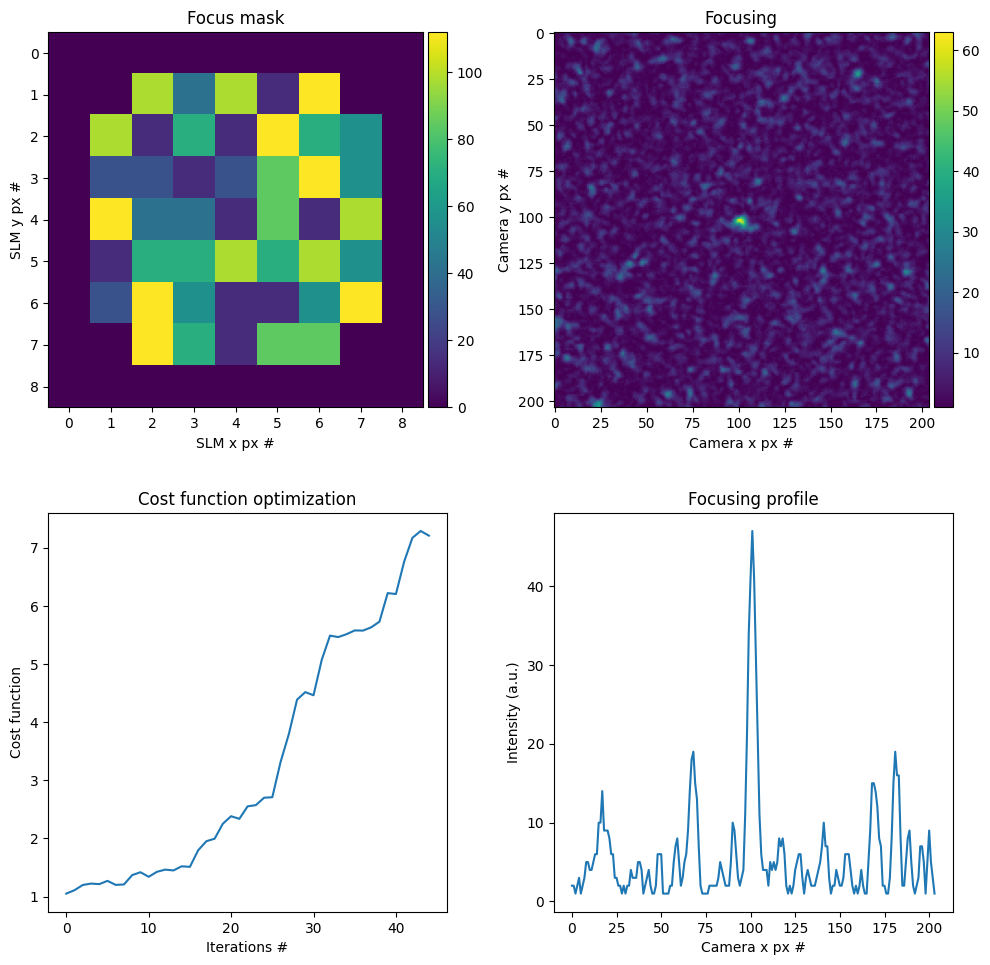

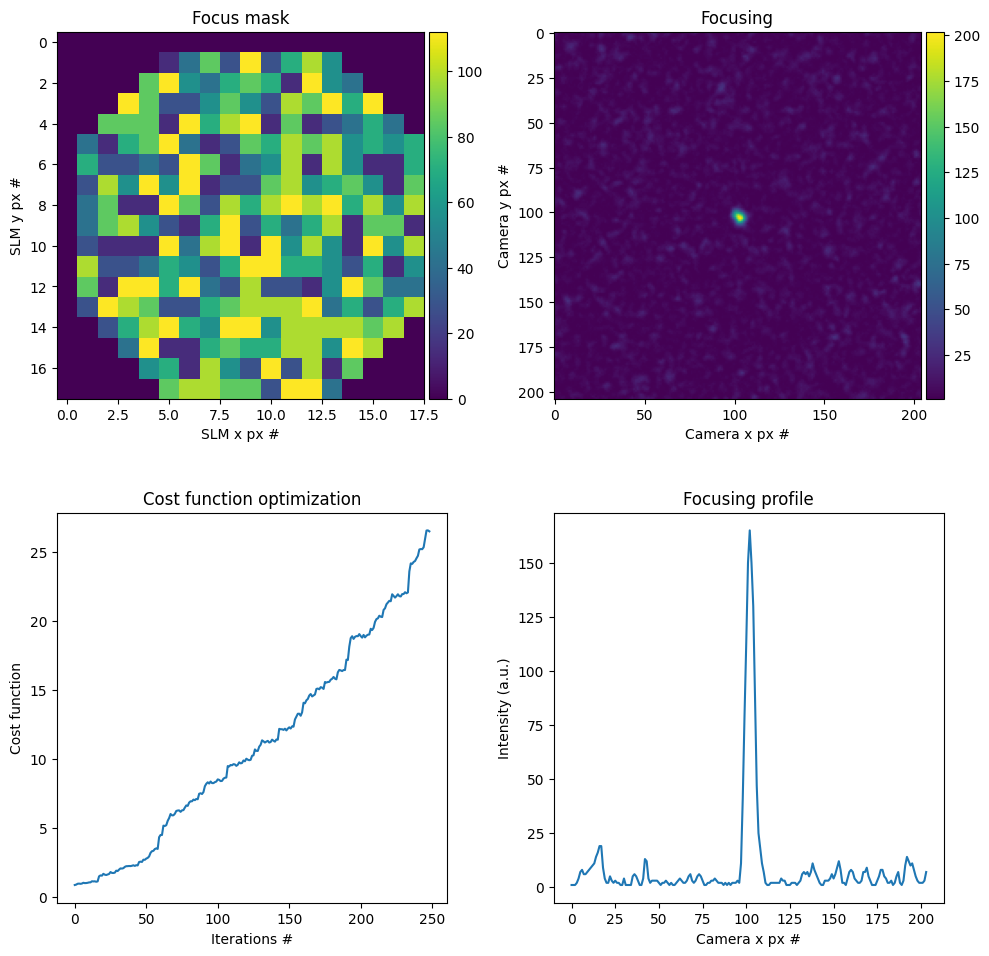

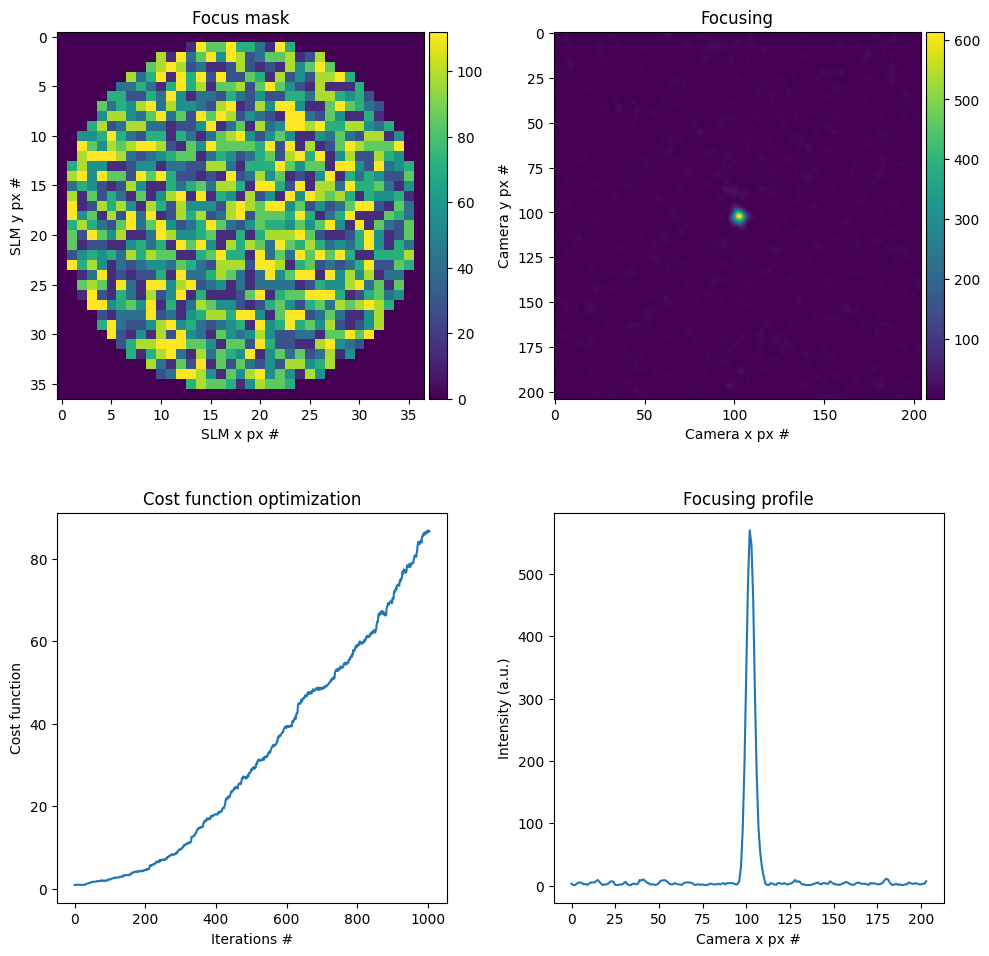

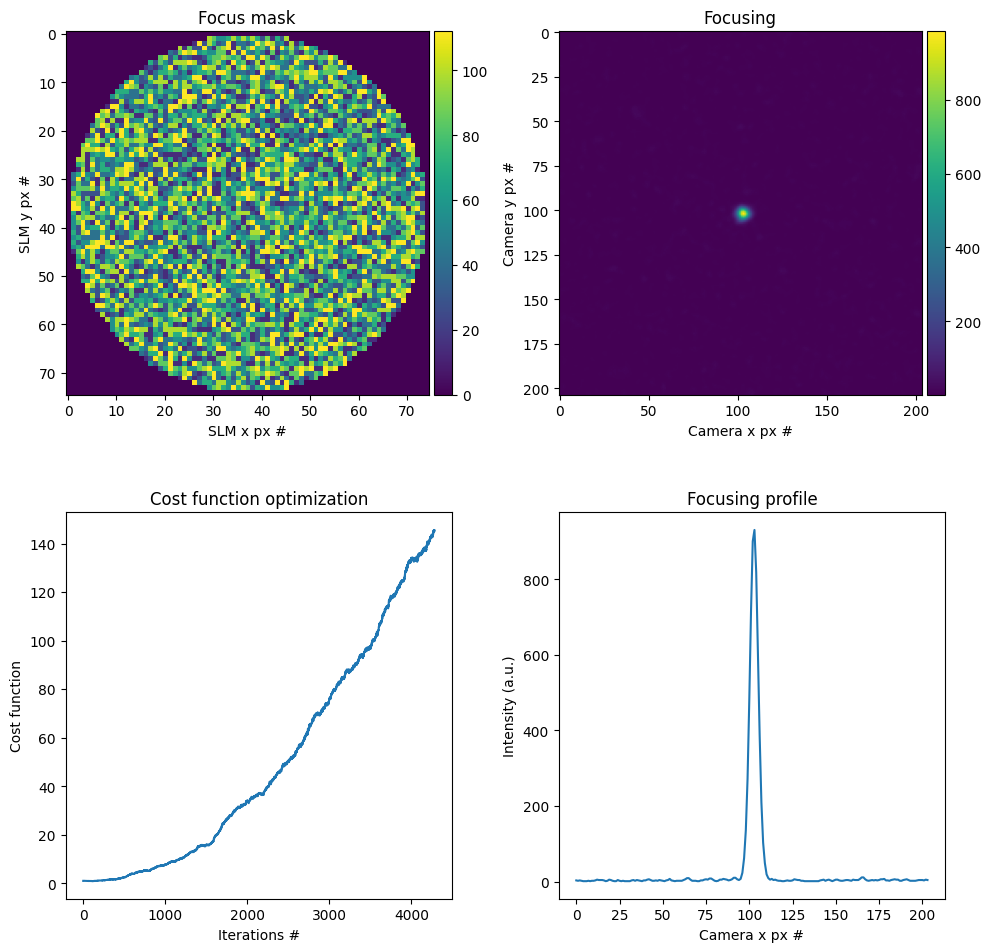

In [116]:
def reset_camera(init, bins, roi_size, time=200):
    
    init.close_cam()
    exposure_time = time
    init = InitExperiment(roi_size, off, bins, exposure_time, gain, timeout)
    camera = init.init_cam()
    return camera, init
    


def focus(pattern):
    # merge phase mask into an slm pattern
    patternSLM = pt.Pattern(resX, resY)
    mask = patternSLM._enlarge_pattern(pattern, slm_macropixels)
    mask = patternSLM.add_subpattern(mask)    
    slm.sendArray(mask)
    
    return mask 

def set_mirror():
    patSLM = pt.Pattern(resX, resY)
    mirror = patSLM.mirror()
    slm.sendArray(mirror)
    time.sleep(.2)
    
def get_frame(camera):
    frame = camera.get_pending_frame_or_null()
    frame = np.copy(frame.image_buffer)
    
    return frame
    
def plot(phase_mask, frame_speck, frame_focus, off=0):
    fig, axs = plt.subplots(2, 2, figsize=(7,7))

    speck = axs[0, 0].imshow(frame_speck)
    axs[0, 0].set_title("Diffusing pattern")
    axs[0, 0].set_xlabel("Camera x px #")
    axs[0, 0].set_ylabel("Camera y px #")
    divider = make_axes_locatable(axs[0, 0])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(speck, cax=cax)   

    mask = axs[1, 0].imshow(phase_mask)
    axs[1, 0].set_title("Focus mask")
    axs[1, 0].set_xlabel("SLM x px #")
    axs[1, 0].set_ylabel("SLM y px #")
    divider = make_axes_locatable(axs[1, 0])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(mask, cax=cax)   

    frame = axs[0, 1].imshow(frame_focus)
    # frame = axs[0, 1].imshow(frame_focus)
    # frame = axs[1].imshow(frame_focus)

    axs[0, 1].set_title("Focusing")
    axs[0, 1].set_xlabel("Camera x px #")
    axs[0, 1].set_ylabel("Camera y px #")
    divider = make_axes_locatable(axs[0, 1])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(frame, cax=cax)   

    profile_line = len(frame_focus) // 2 + off
    axs[1, 1].plot(frame_focus[profile_line][:])
    axs[1, 1].set_box_aspect(1)
    axs[1, 1].set_title("Focus profile")
    axs[1, 1].set_xlabel("Camera x px #")
    axs[1, 1].set_ylabel("Intensity (a.u.) #")

    fig.tight_layout()
    
    timestr = time.strftime("%Y%m%d-%H%M")
    filename = "{}_focus_num_in{}_slm_macro{}.png".format(timestr, num_in, slm_macropixel)
    filepath = os.path.join(path, filename)
    fig.savefig(filepath, dpi=200, transparent=True)

    
    
def signal2noise(frame, dark=1.033, mask_radius=8):
    """ Thank you S. Popoff
        Creates mask with a disk in the center and calculates the ratio of the
        pixel intensity in the disk to the pixel intensity outside the disk.
    """

    res = frame.shape
    
    max_idx = ndimage.maximum_position(frame)
    mask_center = [max_idx[0], max_idx[1]]
    
    
    Y, X = np.meshgrid(np.arange(res[0]),np.arange(res[1]))

    # We generate a mask representing the disk we want to intensity to be concentrated in
    mask = (X - mask_center[0]) ** 2 + (Y - mask_center[1]) ** 2 < mask_radius ** 2

    signal = np.sum((frame) * mask) / np.sum(mask)
    noise = np.sum((frame) * (1. - mask)) / np.sum(1. - mask) - dark
    snr = signal / noise

    return snr, mask
    
if __name__ ==  "__main__":
    
    mag = [4, 5, 6, 7]
    segs = [75, 37, 18, 9]
    
    mag = [7, 6, 5, 4]
    segs = [9, 18, 37, 75]
    
    snrs = []
    masks = []
    frames = []
    
    for num_in, slm_macropixels in zip(segs, mag):
        
        slm_segments = num_in ** 2
        # create pattern loader
        pattern_loader = pt.OnePixelPatternGenerator(slm_segments)
        
        # define cost function
        cost_fun = lambda x: cost_functions.snr(x, mask_radius=4)

        # instantiate optimization class
        optim = ContinuousSequential(slm, camera, 
                                pattern_loader, 
                                total_iterations=1,
                                slm_segments=slm_segments,
                                slm_macropixel=slm_macropixels,
                                phase_steps=phase_steps, 
                                save_path=path)

        # pass cost function to object
        optim.register_callback(cost_fun)

        # run the algorithm
        pattern, cost, _ = optim.run()
        # optim.save_raw()        
        
        focusing_mask = focus(pattern)
        frame_focus = get_frame(camera)
        set_mirror()
        frame_speck = get_frame(camera)
        
        optim.plot(frame_focus, 101)  

        snr, _ = signal2noise(frame_focus, dark=1.033, mask_radius=1)
        masks.append(pattern)
        frames.append(frame_focus)   
        snrs.append(snr)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


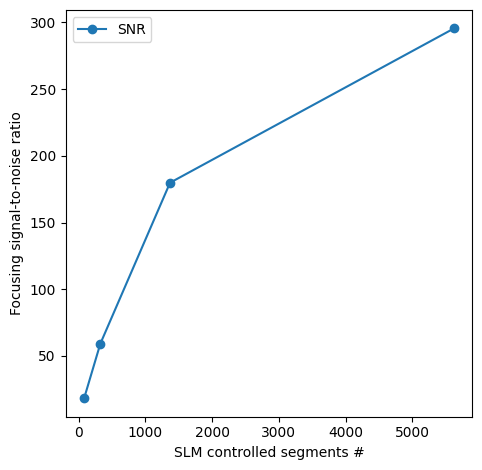

In [120]:
fig, ax = plt.subplots()
x = [9 ** 2, 18 ** 2, 37 ** 2, 75 ** 2]
line, = ax.plot(x, snrs, 'o-', label='SNR')
ax.legend()


ax.set_xlabel('SLM controlled segments #')
ax.set_ylabel('Focusing signal-to-noise ratio')
ax.set_box_aspect(1)

plt.tight_layout()

plt.savefig("optim_SNRs.png", dpi=200, transparent=True)
plt.savefig("optim_SNRs.eps")

KeyError: 0

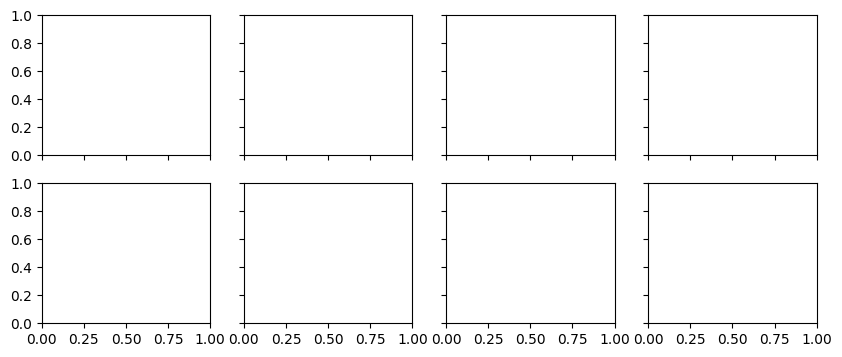

In [141]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

from matplotlib.colors import LogNorm



fig, axs = plt.subplots(2, 4, figsize=(10, 4), sharex=True, sharey='row')

order = [2, 3, 4, 5, 6]
order = [9, 18, 37, 75]
N = [45, 249, 1005, 4281]

for ax, idx in zip(axs.ravel(), range(8)):
    if idx < 4:
        im = ax.imshow(frames[idx], norm=LogNorm(vmin=1, vmax=1000), origin='lower')
        
        title = 'N = ' + str(N[idx])
        ax.set_title(title)
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        fig.colorbar(im, cax=cax)  
        
    else:
        ax.semilogy(frames[idx - 4][101]) 
        ax.set_ylim([1, 1000])
        ax.set_box_aspect(1)

fig.text(0.51, -0.01, 'Camera x px #', ha='center')
fig.text(-0.01, 0.7, 'Camera y px #', va='center', rotation='vertical')
fig.text(-0.01, 0.3, 'Intensity (a.u.)', va='center', rotation='vertical')



fig.tight_layout(h_pad=.001, w_pad=1)

plt.savefig("optim_focus_vs_N.png", dpi=200, transparent=True, bbox_inches = 'tight')
plt.savefig("optim_focus_vs_N.eps", bbox_inches = 'tight')


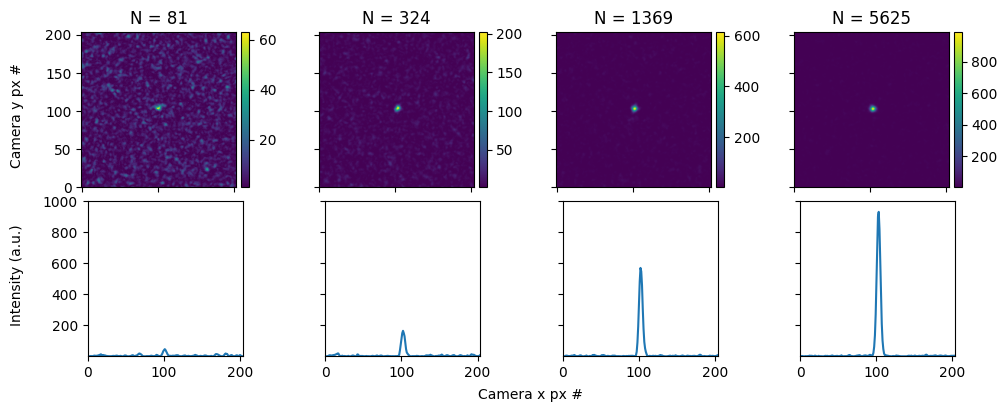

In [122]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

from matplotlib.colors import LogNorm



fig, axs = plt.subplots(2, 4, figsize=(10, 4), sharex=True, sharey='row')

order = [2, 3, 4, 5, 6]
order = [9, 18, 37, 75]

for ax, idx in zip(axs.ravel(), range(8)):
    if idx < 4:
        im = ax.imshow(frames[idx], origin='lower')
        
        N = order[idx] 
        title = 'N = ' + str(N ** 2)
        ax.set_title(title)
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        fig.colorbar(im, cax=cax)  
        
    else:
        ax.plot(frames[idx - 4][101]) 
        ax.set_ylim([1, 1000])
        ax.set_box_aspect(1)

fig.text(0.51, -0.01, 'Camera x px #', ha='center')
fig.text(-0.01, 0.7, 'Camera y px #', va='center', rotation='vertical')
fig.text(-0.01, 0.3, 'Intensity (a.u.)', va='center', rotation='vertical')



fig.tight_layout(h_pad=.001, w_pad=1)

plt.savefig("optim_focus_vs_N_lin.png", dpi=200, transparent=True, bbox_inches = 'tight')
plt.savefig("optim_focus_vs_N_lin.eps", bbox_inches = 'tight')
